In [37]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

In [38]:
df = pd.read_csv("/content/Airline-Customer-Satisfaction.csv")

In [39]:
df.dropna(inplace=True)
display(df.head())

,Satisfaction,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,...,Online Support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checking service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Female,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Male,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Female,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Female,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Female,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,...,4,2,2,0,2,4,2,5,0,0.0


In [40]:
label_enc = LabelEncoder()
df = df.apply(lambda col: label_enc.fit_transform(col) if col.dtype == 'object' else col)

In [41]:
X = df.drop(columns=['Satisfaction'])
y = df['Satisfaction']

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [44]:
log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred = log_reg.predict(X_test)

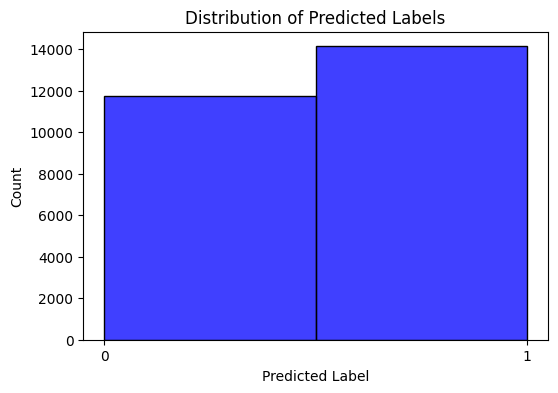

In [45]:
plt.figure(figsize=(6, 4))
sns.histplot(y_pred, bins=2, kde=False, color='blue')
plt.xlabel("Predicted Label")
plt.ylabel("Count")
plt.title("Distribution of Predicted Labels")
plt.xticks([0, 1])
plt.show()

In [46]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [47]:
def predict(X, weights):
    return sigmoid(np.dot(X, weights))

In [48]:
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]

In [49]:
weights = np.zeros(X_train_bias.shape[1])

In [50]:
def compute_cost(X, y, weights):
    m = len(y)
    h = sigmoid(np.dot(X, weights))
    cost = -(1/m) * np.sum(y * np.log(h) + (1 - y) * np.log(1 - h))
    return cost

In [51]:
def gradient_descent(X, y, weights, learning_rate, iterations):
    m = len(y)
    cost_history = []

    for i in range(iterations):
        h = sigmoid(np.dot(X, weights))
        gradient = (1/m) * np.dot(X.T, (h - y))
        weights -= learning_rate * gradient
        cost = compute_cost(X, y, weights)
        cost_history.append(cost)

        if i % 100 == 0:
            print(f"Iteration {i}: Cost {cost}")

    return weights, cost_history

In [52]:
learning_rate = 0.01
iterations = 1000

In [53]:

weights, cost_history = gradient_descent(X_train_bias, y_train, weights, learning_rate, iterations)

Iteration 0: Cost 0.689369907028793
Iteration 100: Cost 0.5103235028432969
Iteration 200: Cost 0.4613080734592386
Iteration 300: Cost 0.43911311718453583
Iteration 400: Cost 0.4262484494342157
Iteration 500: Cost 0.4177775662901277
Iteration 600: Cost 0.4117794895004449
Iteration 700: Cost 0.40733315012019994
Iteration 800: Cost 0.4039305182220521
Iteration 900: Cost 0.4012635456466526


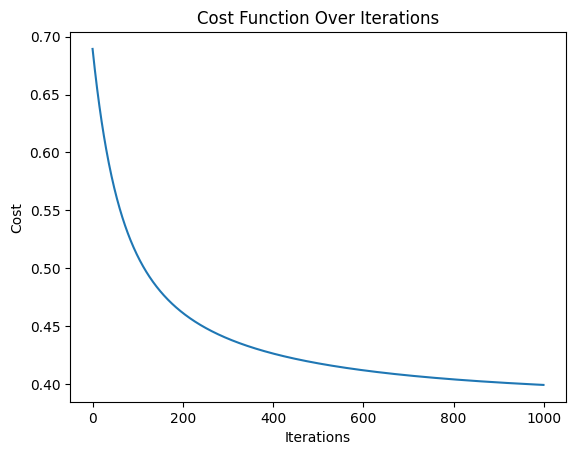

In [54]:
plt.plot(range(iterations), cost_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Function Over Iterations")
plt.show()

In [55]:
y_pred_proba = sigmoid(np.dot(X_test_bias, weights))
y_pred = (y_pred_proba >= 0.5).astype(int)

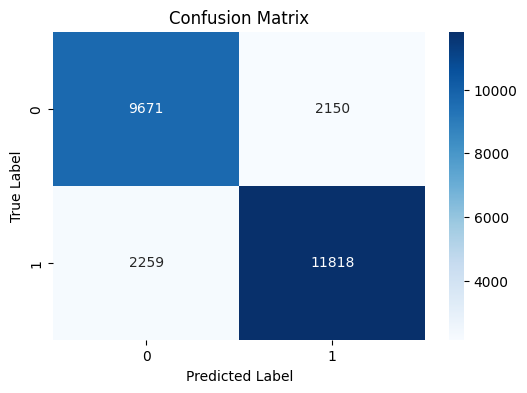

In [56]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [57]:
print("Classification Report:")
print(classification_report(y_test, y_pred))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred)}")

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.82      0.81     11821
           1       0.85      0.84      0.84     14077

    accuracy                           0.83     25898
   macro avg       0.83      0.83      0.83     25898
weighted avg       0.83      0.83      0.83     25898

Accuracy Score: 0.8297551934512317
